# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att4_exp2'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

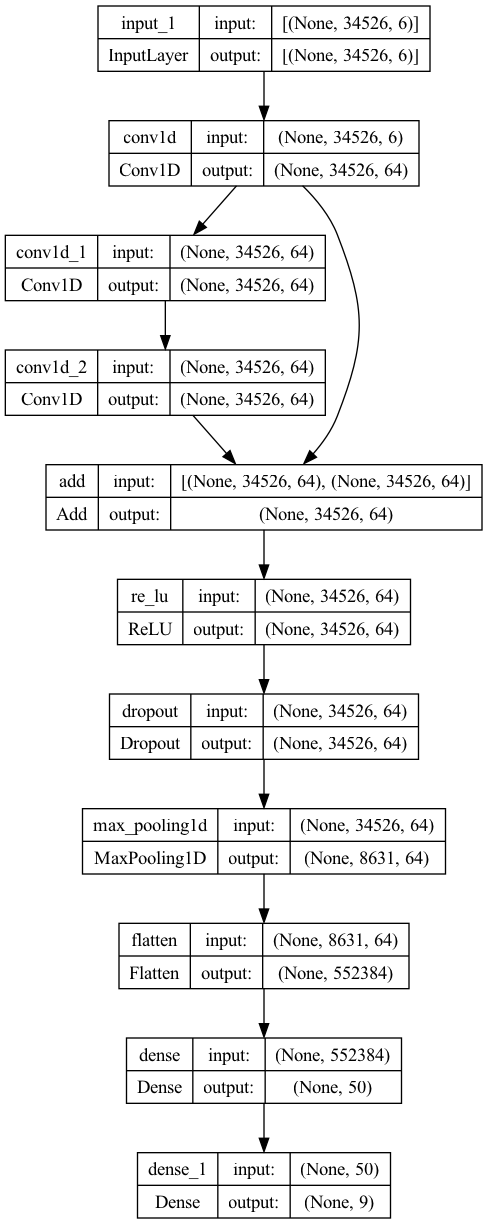

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34526, 64)            3456      ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 34526, 64)            36928     ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 34526, 64)            36928     ['conv1d_1[0][0]']            
                                                                                              

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=2)])

Epoch 1/20
78/78 [==============================] - 1756s 22s/step - loss: 2.5678 - ERM: 0.2747 - KDEL: 0.3363 - LMA: 0.1166 - MITO: 0.1595 - NES: 0.1033 - NIK: 0.0960 - NLS: 0.0862 - NUCP: 0.1551 - OMM: 0.0748 - val_loss: 2.5008 - val_ERM: 0.2474 - val_KDEL: 0.1903 - val_LMA: 0.1053 - val_MITO: 0.3192 - val_NES: 0.2726 - val_NIK: -0.0222 - val_NLS: 0.2875 - val_NUCP: -0.0808 - val_OMM: 0.0550
Epoch 2/20
78/78 [==============================] - 1666s 21s/step - loss: 2.4545 - ERM: 0.3070 - KDEL: 0.3748 - LMA: 0.1795 - MITO: 0.1764 - NES: 0.1616 - NIK: 0.1655 - NLS: 0.1351 - NUCP: 0.1991 - OMM: 0.0956 - val_loss: 2.4278 - val_ERM: 0.2570 - val_KDEL: 0.2128 - val_LMA: 0.1117 - val_MITO: 0.2404 - val_NES: 0.3199 - val_NIK: 0.0263 - val_NLS: 0.3065 - val_NUCP: -0.0700 - val_OMM: 0.0337
Epoch 3/20
78/78 [==============================] - 1664s 21s/step - loss: 2.3981 - ERM: 0.3244 - KDEL: 0.3841 - LMA: 0.1934 - MITO: 0.1935 - NES: 0.1846 - NIK: 0.2023 - NLS: 0.1588 - NUCP: 0.2140 - OMM: 0.1

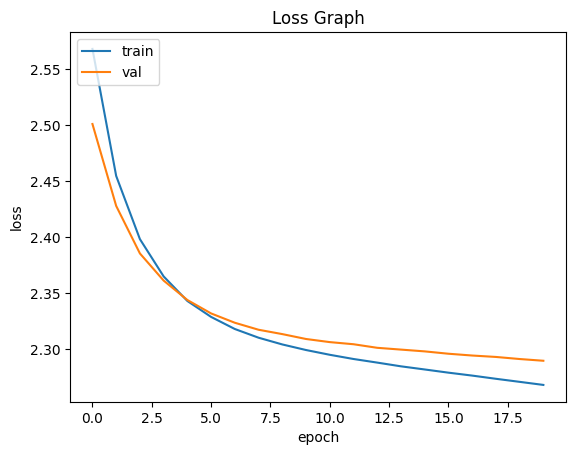

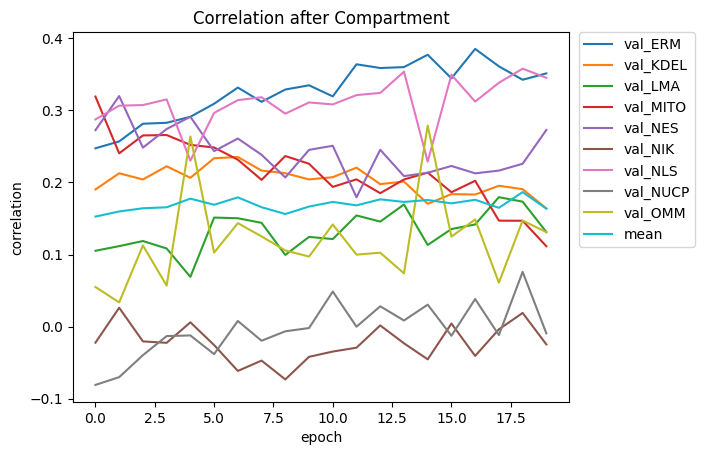

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

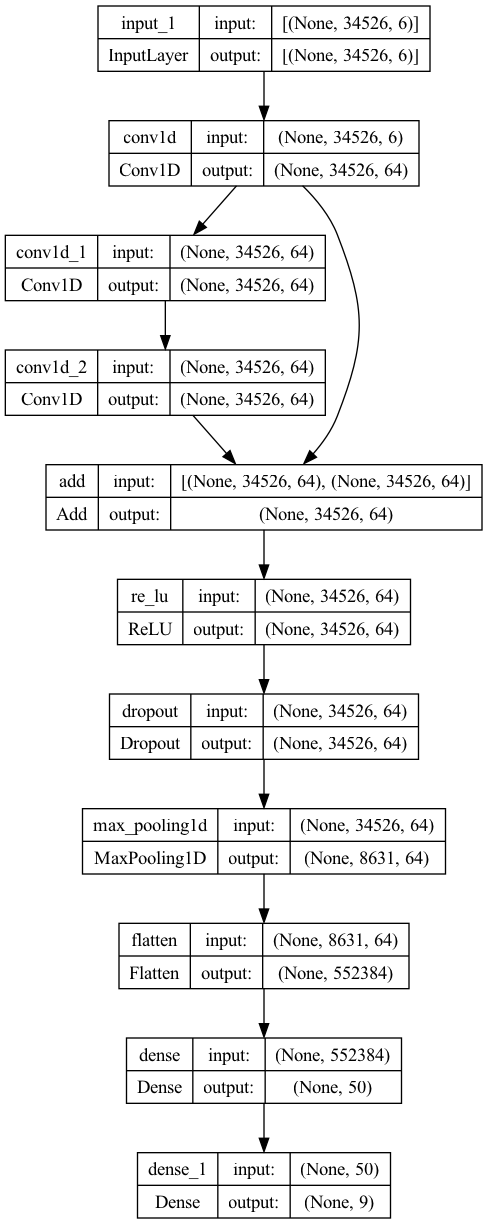

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [9]:
model.save_model(model_output_path)